## Demo

In [1]:
from wavescapes import *
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
#from utils import *
import pandas as pd
import json


In [2]:
scores_muse = glob('./MS3/*.mscx') #to understand how to make musescores work

In [3]:
json_job = []

for score in scores_muse:
    json_job.append({
    "in": score,
    "out": './midi\\' + score.split('\\')[-1][:-5] + '.mid',
  })

#print(json_job)

In [4]:
print(glob('./*'))

['.\\figures', '.\\json_job.json', '.\\measures', '.\\metadata.tsv', '.\\midi', '.\\MS3', '.\\notes', '.\\README.md', '.\\Summary Wavescape.ipynb', '.\\utils.py', '.\\__pycache__']


In [5]:
import os
if '.\\midi' not in glob('./*'):
    print('making folder')
    os.makedirs('midi')
    

In [6]:
with open('json_job.json', 'w') as outfile:
    json.dump(json_job, outfile)

In [ ]:
! MuseScore3.exe -j json_job.json

In [4]:
data = pd.read_csv('./metadata.tsv', sep='\t')
data.head()

,rel_paths,fnames,last_mc,last_mn,KeySig,TimeSig,label_count,composer,workTitle,movementNumber,...,originalFormat,pdf,staff_1_ambitus,staff_1_instrument,staff_2_ambitus,staff_2_instrument,staff_3_ambitus,staff_3_instrument,transcriber,typesetter
0,MS3,MIDIl087-03_images_quelques,186,186,1: -1,"1: 4/4, 74: 6/4, 90: 3/4, 91: 6/8",0,NaN,NaN,NaN,...,mid,NaN,37-100 (C#2-E7),Piano,21-94 (A0-A#6),Piano,NaN,NaN,NaN,NaN
1,MS3,l000_etude,73,71,"1: -4, 7: 0, 9: -5, 38: 0, 42: -4, 48: -3, 57:...",1: 4/4,0,Claude Debussy,Etude Retrouve,NaN,...,NaN,NaN,32-96 (Ab1-C7),Piano,25-91 (Db1-G6),Piano,NaN,NaN,NaN,https://musescore.com/user/33144689
2,MS3,l000_soirs,23,23,1: -4,1: 4/4,0,NaN,NaN,NaN,...,NaN,NaN,54-89 (Gb3-F6),Piano,50-77 (D3-F5),Piano,32-39 (Ab1-Eb2),Piano,NaN,https://musescore.com/sansenk
3,MS3,l009_danse,92,92,"1: 2, 45: 5, 61: 2",1: 2/4,0,Claude Debussy,Danse Bohemian,NaN,...,NaN,NaN,49-94 (C#3-A#6),Piano,35-71 (B1-B4),Piano,NaN,NaN,NaN,https://musescore.com/yazen23434/
4,MS3,l066-01_arabesques-premiere,107,107,"1: 4, 39: 3, 71: 4","1: 4/4, 94: 2/4, 95: 4/4",0,Claude Debussy,Premiere Arabesque,NaN,...,NaN,https://imslp.org/wiki/Special:ReverseLookup/2821,50-92 (D3-G#6),Piano,28-83 (E1-B5),Piano,NaN,NaN,NaN,https://musescore.com/hmscomp


In [5]:
data.columns # to use later especially file name for merging, duration, key, composed start and composed end

Index(['rel_paths', 'fnames', 'last_mc', 'last_mn', 'KeySig', 'TimeSig',
       'label_count', 'composer', 'workTitle', 'movementNumber',
       'movementTitle', 'workNumber', 'poet', 'lyricist', 'arranger',
       'copyright', 'creationDate', 'mscVersion', 'platform', 'source',
       'translator', 'musescore', 'ambitus', 'composed_end', 'composed_start',
       'originalFormat', 'pdf', 'staff_1_ambitus', 'staff_1_instrument',
       'staff_2_ambitus', 'staff_2_instrument', 'staff_3_ambitus',
       'staff_3_instrument', 'transcriber', 'typesetter'],
      dtype='object')

In [6]:
scores = glob('./midi/*.mid')
print(len(scores))

58


In [7]:
score_names = pd.Series(scores, index=[score.split('\\')[-1].split('.')[0] for score in scores], name='filepath')
score_names.head()

l000_etude                                      ./midi\l000_etude.mid
l000_soirs                                      ./midi\l000_soirs.mid
l009_danse                                      ./midi\l009_danse.mid
l066-01_arabesques-premiere    ./midi\l066-01_arabesques-premiere.mid
l067_mazurka                                  ./midi\l067_mazurka.mid
Name: filepath, dtype: object

In [8]:
data = data.merge(score_names, left_on='fnames', right_index=True)
data.head()

,rel_paths,fnames,last_mc,last_mn,KeySig,TimeSig,label_count,composer,workTitle,movementNumber,...,pdf,staff_1_ambitus,staff_1_instrument,staff_2_ambitus,staff_2_instrument,staff_3_ambitus,staff_3_instrument,transcriber,typesetter,filepath
0,MS3,MIDIl087-03_images_quelques,186,186,1: -1,"1: 4/4, 74: 6/4, 90: 3/4, 91: 6/8",0,NaN,NaN,NaN,...,NaN,37-100 (C#2-E7),Piano,21-94 (A0-A#6),Piano,NaN,NaN,NaN,NaN,./midi\MIDIl087-03_images_quelques.mid
1,MS3,l000_etude,73,71,"1: -4, 7: 0, 9: -5, 38: 0, 42: -4, 48: -3, 57:...",1: 4/4,0,Claude Debussy,Etude Retrouve,NaN,...,NaN,32-96 (Ab1-C7),Piano,25-91 (Db1-G6),Piano,NaN,NaN,NaN,https://musescore.com/user/33144689,./midi\l000_etude.mid
2,MS3,l000_soirs,23,23,1: -4,1: 4/4,0,NaN,NaN,NaN,...,NaN,54-89 (Gb3-F6),Piano,50-77 (D3-F5),Piano,32-39 (Ab1-Eb2),Piano,NaN,https://musescore.com/sansenk,./midi\l000_soirs.mid
3,MS3,l009_danse,92,92,"1: 2, 45: 5, 61: 2",1: 2/4,0,Claude Debussy,Danse Bohemian,NaN,...,NaN,49-94 (C#3-A#6),Piano,35-71 (B1-B4),Piano,NaN,NaN,NaN,https://musescore.com/yazen23434/,./midi\l009_danse.mid
4,MS3,l066-01_arabesques-premiere,107,107,"1: 4, 39: 3, 71: 4","1: 4/4, 94: 2/4, 95: 4/4",0,Claude Debussy,Premiere Arabesque,NaN,...,https://imslp.org/wiki/Special:ReverseLookup/2821,50-92 (D3-G#6),Piano,28-83 (E1-B5),Piano,NaN,NaN,NaN,https://musescore.com/hmscomp,./midi\l066-01_arabesques-premiere.mid


In [9]:
from utils import *

utm_max, utm_entropy, utm_argmax, utm = most_resonant(data['filepath'][1], aw_size=4)
utm_max.shape

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


(71, 71)

In [10]:
utm_sum = max_utm_to_ws_utm(utm_entropy, utm_argmax, utm, 'entropy')

In [11]:
#x, y = center_of_mass_v(utm_max, utm)
#print(x, y)

l000_etude


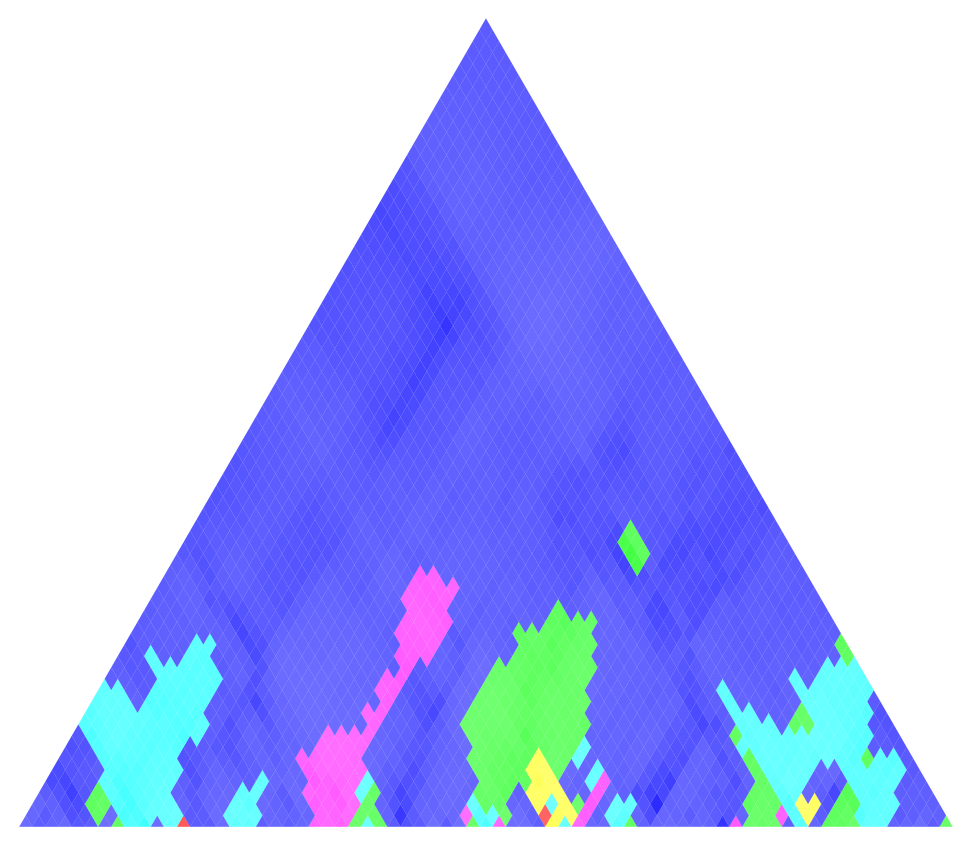

In [12]:
Wavescape(utm_sum, 500).draw()
#plt.plot(x, y, marker="o")
print(data['fnames'][1])

l000_etude


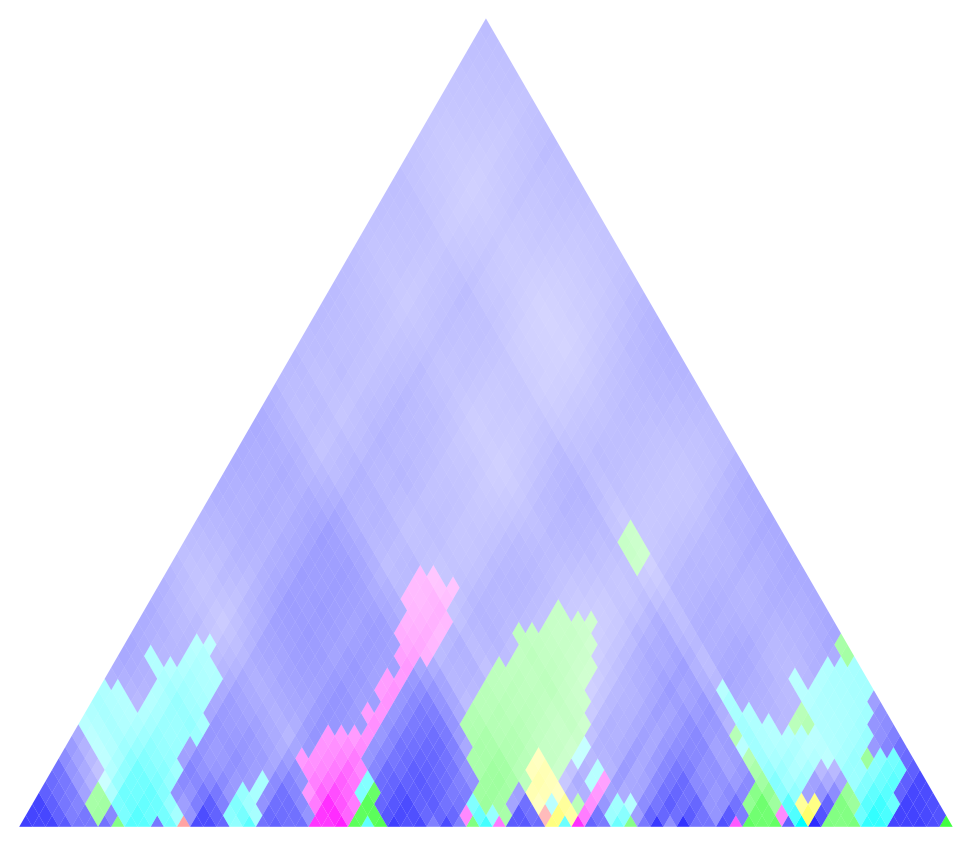

In [13]:
utm_sum = max_utm_to_ws_utm(utm_max, utm_argmax, utm, 'max')
Wavescape(utm_sum, 500).draw()
#plt.plot(x, y, marker="o")
print(data['fnames'][1])

In [14]:
for i in range(1,7):
    x, y = center_of_mass_v(np.abs(utm[:,:,i]), utm)
    print(x, y)


0.5890421664889935 0.2721755466370029
0.6257437531335581 0.20792349098860788
0.6853406179548648 0.24541264415274294
0.5999374493577803 0.20839126934092625
0.6342231233292068 0.28512644384231145
0.5721784436717028 0.22576198655918303


0.6342231233292068 0.28512644384231145
l000_etude


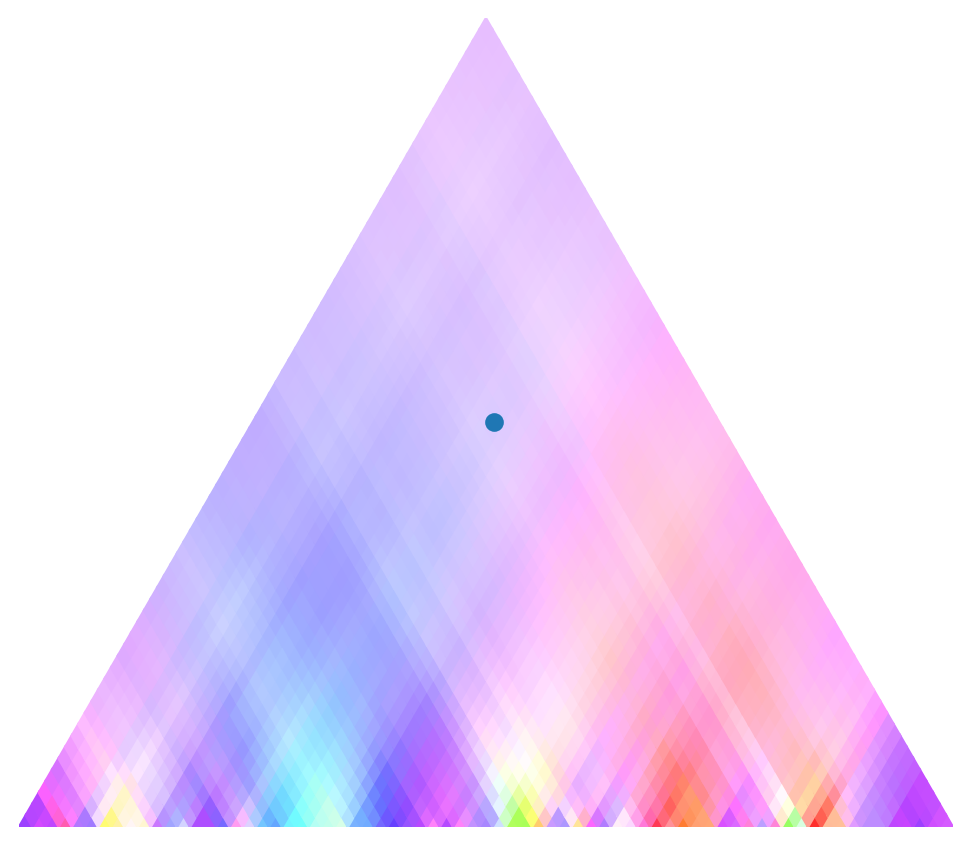

In [18]:
coeff_5 = complex_utm_to_ws_utm(utm, coeff=5)
x, y = center_of_mass_v(np.abs(utm[:,:,5]), utm)
Wavescape(coeff_5, 500).draw()
plt.plot(x, y, marker="o")
print(x, y)
print(data['fnames'][1])

In [ ]:
all_wavescapes(data['filepath'][1], individual_width=500, aw_size=4)

In [ ]:
if '.\\figures' not in glob('./*'):
    print('making folder')
    os.makedirs('figures')


In [ ]:
import matplotlib.patches as mpatches
patches = []
for i in range(6):
    patches.append(mpatches.Patch(color=np.array(circular_hue_revised(i))[:3]/255, label='Coefficient '+str(i+1)))
        
for score in data['filepath']:
    print(str(score.split('\\')[-1].split('.')[0]))
    try:
        #all_wavescapes(score, individual_width=500, aw_size=4, aw_per_tick=1, tick_start=1)
        utm_max, utm_entropy, utm_argmax, utm = most_resonant(score, aw_size=4)
        utm_sum = max_utm_to_ws_utm(utm_max, utm_argmax, utm, 'max')
        Wavescape(utm_sum, 500).draw()
        plt.suptitle(str(score.split('\\')[-1].split('.')[0]) + '\n', fontsize=14)
        plt.legend(handles=patches)
        plt.savefig('./figures/' + str(score.split('\\')[-1].split('.')[0]) + '.png')
    except:
        print('Not successful')

In [ ]:
import matplotlib.patches as mpatches
patches = []
for i in range(6):
    patches.append(mpatches.Patch(color=np.array(circular_hue_revised(i))[:3]/255, label='Coefficient '+str(i+1)))

for score in data['filepath']:
    print(str(score.split('\\')[-1].split('.')[0]))
    try:
        #all_wavescapes(score, individual_width=500, aw_size=4, aw_per_tick=1, tick_start=1)
        utm_max,  utm_entropy, utm_argmax, utm = most_resonant(score, aw_size=4)
        utm_sum = max_utm_to_ws_utm(utm_entropy, utm_argmax, utm, 'entropy')
        Wavescape(utm_sum, 500).draw()
        plt.suptitle('entropy - ' + str(score.split('\\')[-1].split('.')[0]) + '\n', fontsize=14)
        plt.legend(handles=patches)
        plt.savefig('./figures/entropy_' + str(score.split('\\')[-1].split('.')[0]) + '.png')
    except Exception as e:
        print(e)

In [ ]:
# legend
import webcolors

for angle in range(6):

    value = np.array(circular_hue_revised(angle))[:3]
    print('coefficient', angle+1, ':',  webcolors.rgb_to_name(value))

In [ ]:
vcoms = []
for it in data.iterrows():
    print(it[1]['filepath'])
    utm_max, utm_argmax, utm = most_resonant(it[1]['filepath'], aw_size=4)
    vcoms.append(center_of_mass_v(utm_max, utm)[1])

In [61]:
# add vcom for each coefficient

In [ ]:
data['VCOM'] = vcoms

In [ ]:
plt.scatter(data['composed_start'], data['VCOM'])

In [ ]:
plt.scatter(data['composed_end'], data['VCOM'])

In [15]:
from utils import *
utm_max, utm_entropy, utm_argmax, utm = most_resonant(data['filepath'][1], aw_size=4)
arr1 = produce_pitch_class_matrix_from_filename(data['filepath'][1], aw_size=4)

arr1.shape

(71, 12)

In [16]:
utm_tritone = pitch_class_matrix_to_tritone(arr1)
print(utm_tritone.shape)
#utm_tritone[0]

(71, 71, 1)


In [17]:
arr1[0]

array([1.  , 0.  , 0.  , 2.  , 0.  , 1.5 , 0.  , 0.  , 5.  , 0.  , 0.25,
       0.  ])

In [18]:
arr2 = np.roll(arr1, 6, axis=1)
arr2[0]

array([0.  , 0.  , 5.  , 0.  , 0.25, 0.  , 1.  , 0.  , 0.  , 2.  , 0.  ,
       1.5 ])

In [19]:
tritone = arr1 * arr2
tritone[4]

array([7.29166667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 7.29166667, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [20]:
utm.shape

(71, 71, 7)

In [21]:
utm = np.abs(utm)
x,y = center_of_mass_v(utm_max, utm)

In [22]:
utm = np.concatenate((utm, utm_tritone), axis=2)
utm.shape

(71, 71, 8)

In [23]:
# major and minor detector

key_profiles = {
    'major': np.array(list(MOZART_PROFILES['major'].values())),
    'minor': np.array(list(MOZART_PROFILES['minor'].values()))
}
rotated_kp = {(mode, rotation): np.roll(kp, rotation) for mode, kp in key_profiles.items() for rotation in range(12)}
rotated_kp

{('major',
  0): array([0.200337  , 0.01081261, 0.1139921 , 0.01210411, 0.13638737,
        0.12263113, 0.01899352, 0.20490465, 0.01461186, 0.07414111,
        0.01135115, 0.07973339]),
 ('major',
  1): array([0.07973339, 0.200337  , 0.01081261, 0.1139921 , 0.01210411,
        0.13638737, 0.12263113, 0.01899352, 0.20490465, 0.01461186,
        0.07414111, 0.01135115]),
 ('major',
  2): array([0.01135115, 0.07973339, 0.200337  , 0.01081261, 0.1139921 ,
        0.01210411, 0.13638737, 0.12263113, 0.01899352, 0.20490465,
        0.01461186, 0.07414111]),
 ('major',
  3): array([0.07414111, 0.01135115, 0.07973339, 0.200337  , 0.01081261,
        0.1139921 , 0.01210411, 0.13638737, 0.12263113, 0.01899352,
        0.20490465, 0.01461186]),
 ('major',
  4): array([0.01461186, 0.07414111, 0.01135115, 0.07973339, 0.200337  ,
        0.01081261, 0.1139921 , 0.01210411, 0.13638737, 0.12263113,
        0.01899352, 0.20490465]),
 ('major',
  5): array([0.20490465, 0.01461186, 0.07414111, 0.01135115

In [24]:
utm_major_minor = pitch_class_matrix_to_minor_major(arr1, rotated_kp)

In [25]:
utm_major_minor.shape

(71, 71, 2)

In [26]:
utm = np.concatenate((utm, utm_major_minor), axis=2)
utm.shape

(71, 71, 10)

In [27]:
from sklearn.preprocessing import MinMaxScaler

data_exp = pd.DataFrame(utm[:,:,1:].reshape(71*71, 9))
data_exp = data_exp[data_exp[0] != 0]
data_exp.columns = ['Coeff 1', 'Coeff 2', 'Coeff 3', 'Coeff 4', 'Coeff 5', 'Coeff 6', 'Tritone', 'Major', 'Minor']
scaler = MinMaxScaler()

data_exp = pd.DataFrame(scaler.fit_transform(data_exp), columns=data_exp.columns)

data_exp

,Coeff 1,Coeff 2,Coeff 3,Coeff 4,Coeff 5,Coeff 6,Tritone,Major,Minor
0,0.037175,0.071890,0.040901,0.039471,0.023786,0.027990,0.0,0.858058,0.453036
1,0.027792,0.020440,0.025702,0.030842,0.018056,0.005089,0.0,0.814334,0.337851
2,0.018621,0.036485,0.025890,0.025781,0.017741,0.007634,0.0,0.944207,0.434383
3,0.057681,0.083762,0.060417,0.032436,0.046577,0.051739,0.0,0.590859,0.796021
4,0.007699,0.081014,0.054226,0.021854,0.041815,0.025445,1.0,0.854980,0.822785
...,...,...,...,...,...,...,...,...,...
2551,0.969067,0.531440,0.836649,0.922811,0.947425,0.401187,1.0,1.000000,1.000000
2552,0.918606,0.545218,0.854457,0.922954,0.952968,0.444444,1.0,1.000000,1.000000
2553,1.000000,0.508476,0.876658,0.965316,0.973754,0.429177,1.0,1.000000,1.000000
2554,0.947024,0.529002,0.882167,0.957975,0.973684,0.439355,1.0,1.000000,1.000000


In [32]:
from scipy.stats import pearsonr

for col in data_exp.columns:
    for col2 in data_exp.columns:
        if col != col2:
            corr = pearsonr(data_exp[col], data_exp[col2])
            if abs(corr[0]) > 0.5:
                print(col, col2)
                print(pearsonr(data_exp[col], data_exp[col2]))

Coeff 1 Coeff 4
(0.5421821702836909, 2.615628478911946e-195)
Coeff 1 Coeff 5
(0.8943168793552788, 0.0)
Coeff 3 Coeff 5
(0.6083672986780262, 1.1862980601749502e-258)
Coeff 3 Minor
(0.5645126006191105, 4.3666678109809616e-215)
Coeff 4 Coeff 1
(0.5421821702836909, 2.615628478911946e-195)
Coeff 4 Coeff 5
(0.5698343026522824, 5.016404804263605e-220)
Coeff 5 Coeff 1
(0.8943168793552788, 0.0)
Coeff 5 Coeff 3
(0.6083672986780262, 1.1862980601749502e-258)
Coeff 5 Coeff 4
(0.5698343026522824, 5.016404804263605e-220)
Coeff 5 Minor
(0.5509000567636364, 7.487971625657306e-203)
Major Minor
(0.5739279599274236, 6.895646553297351e-224)
Minor Coeff 3
(0.5645126006191105, 4.3666678109809616e-215)
Minor Coeff 5
(0.5509000567636364, 7.487971625657306e-203)
Minor Major
(0.5739279599274236, 6.895646553297351e-224)
